In [7]:
# importing all needed libraries
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [28]:
# change file path to the location of the experiment recordings
file_path = 'ExperimentRecordings/F1TENTH__2024-09-10_09-30-59_MPPI_with_delay__RCA1_mpc_50Hz_vel_0.5_noise_c[0.0, 0.0]_mu_0.3.csv'
num_comment_lines = 8

In [29]:
# get current working directory
current_working_dir = os.getcwd()

# remove the last folder from the path to get the base path
if 'run' in current_working_dir:
    base_path = current_working_dir.split('run')[0]  
else:
    base_path = current_working_dir  

# joining the base path with the file path
dir_path = os.path.join(base_path, file_path)

# Check if the directory exists
if not os.path.exists(dir_path):
    print(f"Directory '{dir_path}' does not exist.")

In [32]:
# read the comments from the csv file
with open(dir_path, 'r') as file:
    df_comments = [next(file).strip() for _ in range(num_comment_lines)]
    print(df_comments)
# read the csv file without the comments
df = pd.read_csv(dir_path, skiprows=num_comment_lines)

['# This is F1TENTH simulation from 10.09.2024 at time 09:30:59', '# Done with git-revision: unknown', '# Starting position :,"[3.62, 6.26, 0.378]"', '# Timestep: 0.02 s', '# Speedfactor 0.5', '# Controller: Blank-MPPI-1', '# 2-laptime: 60.0 s (uncomplete)', '# Data:']


In [33]:
# modify the time column to start from 0
df['time'] = pd.to_timedelta(df['time'], unit='s')

average_velocity = df['linear_vel_x'].mean()
print(f'Durchschnittliche Geschwindigkeit: {average_velocity:.2f} m/s')

start_time = pd.to_timedelta(0, unit='s')
end_time = pd.to_timedelta(10, unit='s')
subset_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

Durchschnittliche Geschwindigkeit: 2.39 m/s


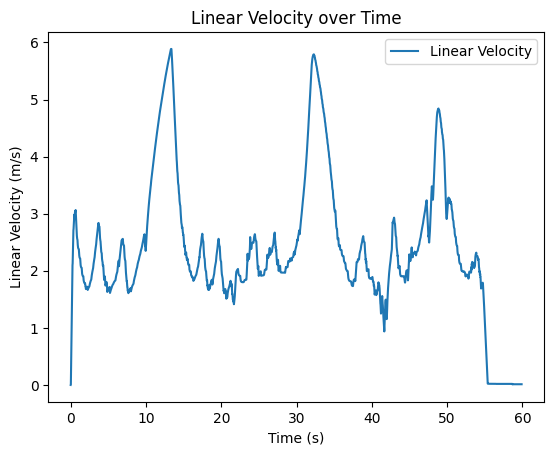

In [34]:
plt.plot(df['time'].dt.total_seconds(), df['linear_vel_x'], label='Linear Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Linear Velocity (m/s)')
plt.title('Linear Velocity over Time')
plt.legend()
plt.show()

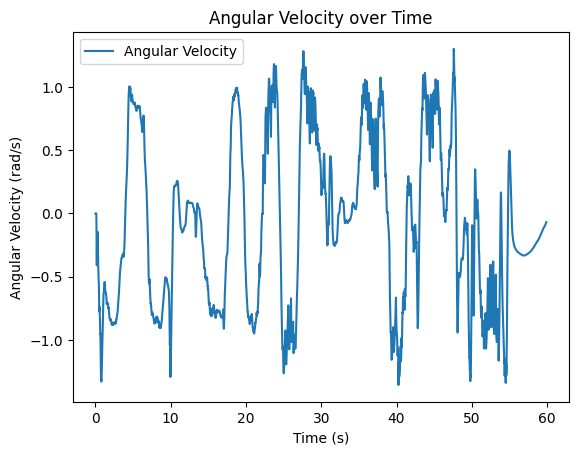

In [35]:
plt.plot(df['time'].dt.total_seconds(), df['angular_vel_z'], label='Angular Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity over Time')
plt.legend()
plt.show()

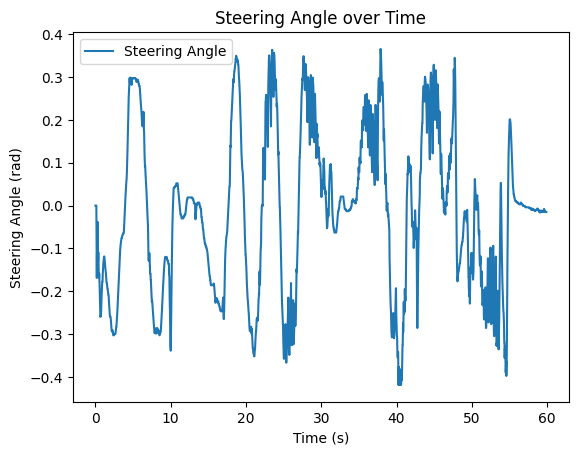

In [36]:
plt.plot(df['time'].dt.total_seconds(), df['steering_angle'], label='Steering Angle')
plt.xlabel('Time (s)')
plt.ylabel('Steering Angle (rad)')
plt.title('Steering Angle over Time')
plt.legend()
plt.show()

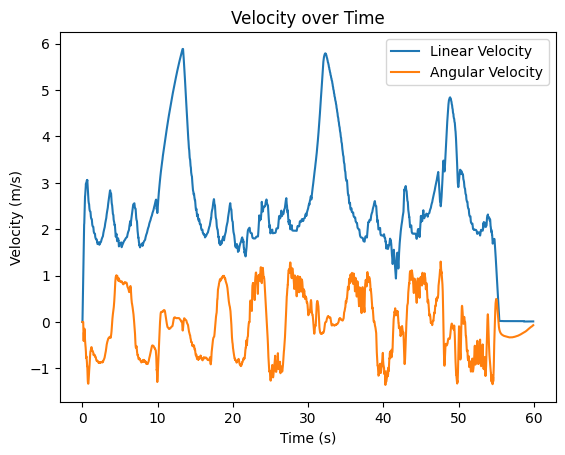

In [37]:
plt.plot(df['time'].dt.total_seconds(), df['linear_vel_x'], label='Linear Velocity')
plt.plot(df['time'].dt.total_seconds(), df['angular_vel_z'], label='Angular Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity over Time')
plt.legend()
plt.show()


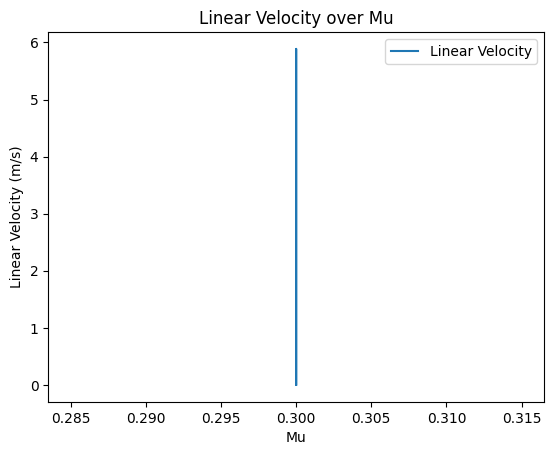

In [38]:
plt.plot(df['mu'], df['linear_vel_x'], label='Linear Velocity')
plt.xlabel('Mu')
plt.ylabel('Linear Velocity (m/s)')
plt.title('Linear Velocity over Mu')
plt.legend()
plt.show()

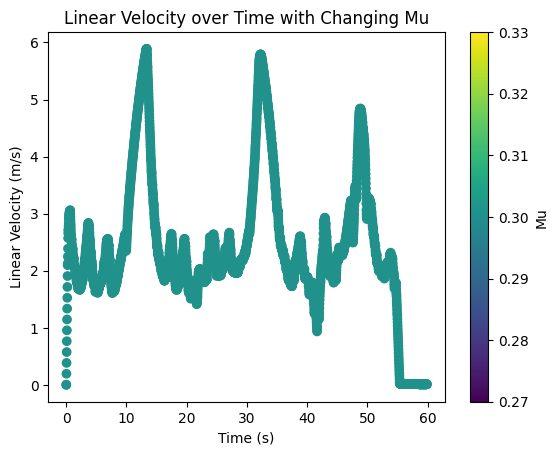

In [39]:
# Normalize the 'mu' values to the range [0, 1] for colormap
norm = plt.Normalize(df['mu'].min(), df['mu'].max())

# Create a scatter plot with color mapping based on 'mu'
plt.scatter(df['time'].dt.total_seconds(), df['linear_vel_x'], c=df['mu'], cmap='viridis', norm=norm)
plt.colorbar(label='Mu')  # Add a colorbar to show the mapping of colors to 'mu' values
plt.xlabel('Time (s)')
plt.ylabel('Linear Velocity (m/s)')
plt.title('Linear Velocity over Time with Changing Mu')
plt.show()